<a href="https://colab.research.google.com/github/udayameister/Connectome/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection with OpenCV



In [51]:
# import necessary packages
import cv2
from google.colab.patches import cv2_imshow

In [52]:
# download the haar cascade file for frontal face detector
!wget https://github.com/arunponnusamy/face-detection-comparison/raw/master/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/rk45825243/Face-eye-detection-using-Haar-Cascade-classifier/master/haarcascade_eye.xml

--2023-10-16 06:56:04--  https://github.com/arunponnusamy/face-detection-comparison/raw/master/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arunponnusamy/face-detection-comparison/master/haarcascade_frontalface_default.xml [following]
--2023-10-16 06:56:04--  https://raw.githubusercontent.com/arunponnusamy/face-detection-comparison/master/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K 

In [53]:
# initialize face detector
face_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier("haarcascade_eye.xml")

In [54]:
!wget https://previews.123rf.com/images/alphaspirit/alphaspirit1504/alphaspirit150400118/38665682-simple-young-man-face-smiling-and-optimistic.jpg -O face.jpg
!ls

--2023-10-16 06:56:11--  https://previews.123rf.com/images/alphaspirit/alphaspirit1504/alphaspirit150400118/38665682-simple-young-man-face-smiling-and-optimistic.jpg
Resolving previews.123rf.com (previews.123rf.com)... 13.226.210.128, 13.226.210.86, 13.226.210.92, ...
Connecting to previews.123rf.com (previews.123rf.com)|13.226.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139772 (136K) [image/jpeg]
Saving to: ‘face.jpg’

face.jpg            100%[===================>] 136.50K  --.-KB/s    in 0.02s   

2023-10-16 06:56:11 (5.63 MB/s) - ‘face.jpg’ saved [139772/139772]

face1.jpg  haarcascade_eye.xml			haarcascade_frontalface_default.xml.1
face2.jpg  haarcascade_eye.xml.1		sample_data
face.jpg   haarcascade_frontalface_default.xml


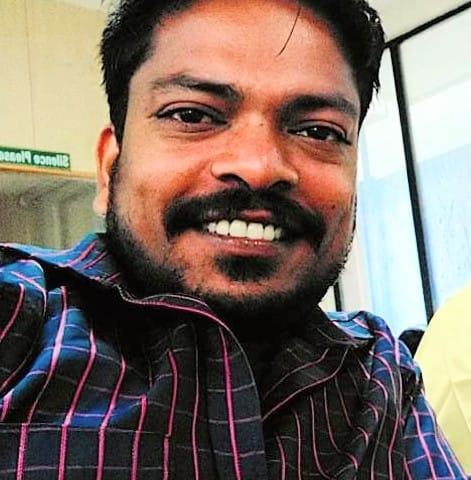

In [56]:
# process input image
image = cv2.imread('face1.jpg')
cv2_imshow(image)

In [57]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

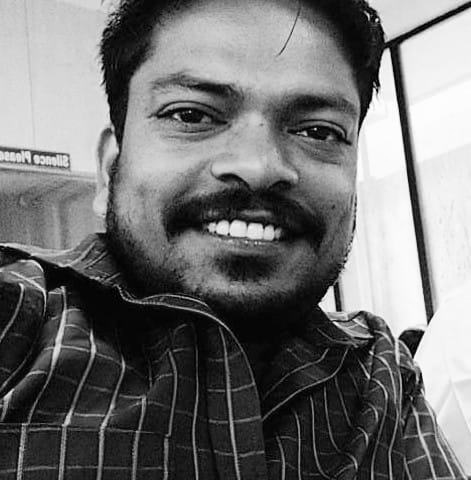

In [58]:
cv2_imshow(gray)

In [59]:
# run the detector
faces = face_detector.detectMultiScale(gray, 1.6 , 5)
print(faces)

[[127  22 252 252]]


In [61]:
# loop through detected faces and draw rectangle
for (x,y,w,h) in faces:
  face_roi_color = image[y:y+h, x:x+w]
  face_roi = gray[y:y+h, x:x+w]
  eyes = eye_detector.detectMultiScale(face_roi)
  print(eyes)
  for (x1,y1,w1,h1) in eyes:
    cv2.rectangle(face_roi_color, (x1,y1), (x1+w1,y1+h1), (0,0,255), 2)
  cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

[[ 16  49  89  89]
 [156  76  69  69]]


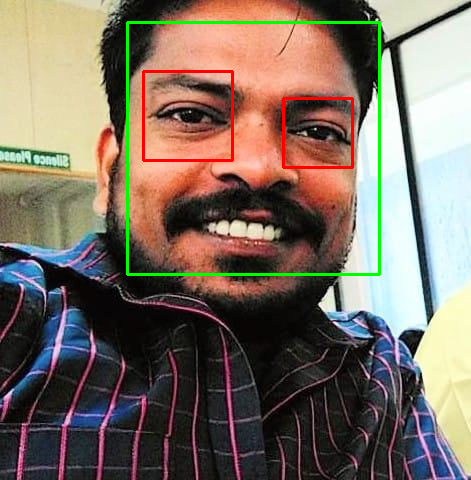

In [62]:
# display output
#cv2.imshow("face detection - opencv haar", image)
cv2_imshow(image)